# LU 분해법

**실습을 시작하기 전에, 메뉴의 [런타임]-[런타임 유형 변경]에서 '하드웨어 가속기'를 'CPU'로 선택해야 한다.**

이번 실습에서는 LU 분해법을 이용해 간단한 열전달 문제를 풀어보겠다.

우리가 해결해야 할 문제는 다음과 같다:
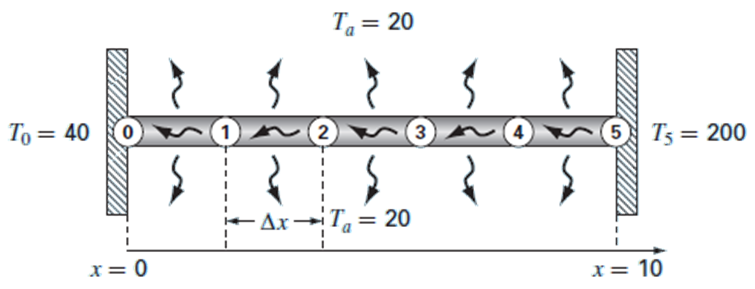

위의 그림과 같이 길고 얇은 단면을 가지는 길이 10의 막대기가 두 벽 사이에 연결되어 있다. 이 때, 두 벽은 일정한 온도로 유지되고 있다. 왼쪽 벽은 $T_0=40$, 오른쪽 벽은 $T_5=200$으로 유지되고 있다. 또한, 대기의 온도는 $T_a=20$이고 막대기와 대기 사이의 열전달 계수는 $h^\prime=0.01$이다. 이 문제를 풀기 위해서는 원래 아래와 같은 미분방정식을 풀어야 한다:

$$
\frac{d^2T}{dx^2}+h^\prime\left(T_a-T\right)=0
$$

그러나 여기서는 미분방정식을 근사화시켜 다음과 같은 연립방정식으로 표현할 수 있다:

$$
{\underbrace{\left[\begin{matrix}2.04&-1&0&0\\-1&2.04&-1&0\\0&-1&2.04&-1\\0&0&-1&2.04\\\end{matrix}\right]}_{\mathbf{A}}}{\underbrace{\left\{\begin{matrix}T_1\\T_2\\T_3\\T_4\\\end{matrix}\right\}}_{\mathbf{t}}}={\underbrace{\left\{\begin{matrix}40.8\\0.8\\0.8\\200.8\\\end{matrix}\right\}}_{\mathbf{b}}}\tag{1}
$$

따라서 이번 실습에서는 **식 (1)**의 방정식 해를 찾아보도록 하겠다.

우선 필요한 모듈을 불러온다.

In [ ]:
import numpy as np
import scipy # SciPy 라이브러리를 불러온다.
import matplotlib.pyplot as plt

## LU 분해를 이용해 해 찾기

LU 분해를 이용해 해를 찾아보겠다. 우선 행렬 $\mathbf{A}$와 $\mathbf{b}$에 해당하는 변수를 다음과 같이 만든다:

In [ ]:
A = np.array([[2.04, -1, 0, 0], [-1, 2.04, -1, 0], [0, -1, 2.04, -1], [0, 0, -1, 2.04]])
b = np.array([40.8, 0.8, 0.8, 200.8]);

LU 분해는 [SciPy](https://scipy.org/) 라이브러리의 [scipy.linalg.lu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) 함수를 이용하여 할 수 있다.

In [ ]:
P, L, U = scipy.linalg.lu(A)

$\mathbf{L}$과 $\mathbf{U}$의 값을 확인해 보자. $\mathbf{L}$은 상삼각행렬로, $\mathbf{U}$는 하삼각행렬로 표현되어야 한다. 그리고, $\mathbf{L}$과 $\mathbf{U}$의 행렬을 곱하여 그 결과가 행렬 A와 동일한지도 확인해 보자.

In [ ]:
print("P=", P)
print("L=", L)
print("U=", U)
print("LU=", L.dot(U))

이어서 전진소거를 해보겠다. 전진소거는 아래 식에서 행렬 $\mathbf{d}$를 찾는 것이다:

$$
\mathbf{Ld}=\mathbf{Pb}
$$


이는 numpy의 [np.linalg.solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) 함수를 이용하면 된다.

In [ ]:
d = np.linalg.solve(L, P.dot(b))
print(d)

그리고, 계산한 $\mathbf{d}$를 이용해 $\mathbf{t}$를 찾는다. 이는 아래 식에 대해 후진대입을 하여 계산할 수 있다:

$$
\mathbf{Ut}=\mathbf{d}\tag{2}
$$

**지시: 아래에 t를 계산하는 코드를 완성하시오.**

In [ ]:
## 앞에서 계산한 U와 d를 이용해 식 (2)를 파이썬 코드로 표현하시오,
## 아래 코드를 적절히 수정하시오.
#### 코드 시작 ####
t = 0
#### 코드 종료

print(t)

다음 코드를 실행하여 "**성공**"이라고 출력되는지 확인한다.

In [ ]:
assert abs(t[0] - 65.9698) < 0.001
assert abs(t[1] - 93.7785) < 0.001
assert abs(t[2] - 124.5382) < 0.001
assert abs(t[3] - 159.4795) < 0.001

print("성공!!")

이제 계산한 결과를 그래프로 그려보겠다.

In [ ]:
y = [40, *t, 200]
x = np.arange(0, 12, 2)

fig, ax = plt.subplots()

ax.plot(x, y, '-x')
ax.set_xlabel('x')
ax.set_ylabel('T')
ax.grid()

위 그래프에서, x-축은 막대기의 각 지점의 위치를 나타낸다. y-축은 각 지점에서의 온도를 나타낸다.

## 삼중대각 시스템

**식 (1)**은 삼중대각 시스템이기 때문에 문제를 더 빨리 풀 수 있다. LU 분해를 이용하면 $O(n^3)$의 시간이 걸리지만, 삼중대각 시스템으로 가정하고 풀면 $O(n)$의 시간이 걸린다. 삼중대각 시스템은 아래와 같이 표현한다:

$$
\left[\begin{matrix}f_1&g_1&&&&&&\\e_2&f_2&g_2&&&&&\\&e_3&f_3&g_3&&&&\\&&.&.&.&&&\\&&&.&.&.&&\\&&&&.&.&.&\\&&&&&e_{n-1}&f_{n-1}&g_{n-1}\\&&&&&&e_n&f_n\\\end{matrix}\right]\left\{\begin{matrix}x_1\\x_2\\x_3\\.\\.\\.\\x_{n-1}\\x_n\\\end{matrix}\right\}=\left\{\begin{matrix}r_1\\r_2\\r_3\\.\\.\\.\\r_{n-1}\\r_n\\\end{matrix}\right\}\tag{3}
$$

이 때, 삼중대각 시스템의 전진소거 공식과 후진대입 공식은 다음과 같다:

### 전진소거

$$
\begin{align}
For\ k&=2,\cdots,n,\\
&f_k\gets f_k-\frac{e_k}{f_{k-1}}g_{k-1},\tag{4}\\
&r_k\gets r_k-\frac{e_k}{f_{k-1}}r_{k-1}\tag{5}
\end{align}
$$

### 후진대입

$$
\begin{align}
&x_n=\frac{r_n}{f_n},\tag{6}\\
\\
For\ k&=\left(n-1\right),\cdots,1,\\
\ x_k&=\frac{r_k-g_kx_{k+1}}{f_k}\tag{7}
\end{align}
$$

**지시: 위의 공식을 참고하여 삼중대각 시스템의 해를 계산하는 다음 함수를 완성하시오.**

In [ ]:
def tridiag(e, f, g, r):
  '''
  함수 tridiag는 삼중대각시스템 문제를 풀기 위한 알고리즘을 구현합니다.
  입력 매개변수:
    e, f, g: 삼중대각 행렬의 원소값
    r: Ax=r에서의 우변값
  출력 매개변수:
    x: Ax=r의 근
  '''

  # 행렬의 크기를 가져옵니다.
  n = len(f)

  # 전진소거
  x = np.zeros([n])
  for k in range(1, n): # k = 1, 3, ..., n-1 에 대해
    # 식 (4)을 이용해 f_k를 계산하시오.
    ## 아래 코드를 적절히 수정하시오.
    #### 코드 시작 ####
    f[k] = 0
    #### 코드 종료

    # 식 (5)를 이용해 r_k를 계산하시오.
    ## 아래 코드를 적절히 수정하시오.
    #### 코드 시작 ####
    r[k] = 0
    #### 코드 종료

  # 후진대입
  x[n-1] = r[n-1] / f[n-1] # 식 (6)를 이용해 x_n을 계산한다.
  for k in range(n-2, -1, -1): # k = n-2, n-3, ..., 0
    # 식 (7)을 이용해 x_k를 계산하시오.
    ## 아래 코드를 적절히 수정하시오.
    #### 코드 시작 ####
    x[k] = 0
    #### 코드 종료

  return x

다음 코드는 위에 구현한 tridiag 함수를 테스트 하는 코드이다. 다음 코드를 실행하여 "**성공**"이라고 출력되는지 확인한다.

In [ ]:
e = np.array([0, -0.4, -0.4])
f = np.array([0.8, 0.8, 0.8])
g = np.array([-0.4, -0.4, 0])
r = np.array([41, 25, 105])

x = tridiag(e, f, g, r)

assert abs(x[0] - 173.1250) < 0.001
assert abs(x[1] - 243.7500) < 0.001
assert abs(x[2] - 253.1250) < 0.001

print("성공!!")

위에서 구현한 tridiag 함수를 가지고 **식 (1)**을 풀어보겠다. **식 (1)**을 **식 (3)**에 맞춰 표현하면, $\mathbf{e}$, $\mathbf{f}$, $\mathbf{g}$, $\mathbf{r}$은 다음과 같다:

$$
\mathbf{e}=\left[\begin{matrix}e_1&e_2&e_3&e_4\\\end{matrix}\right]=\left[\begin{matrix}0&-1&-1&-1\\\end{matrix}\right]\\
\mathbf{f}=\left[\begin{matrix}f_1&f_2&f_3&f_4\\\end{matrix}\right]=\left[\begin{matrix}2.04&2.04&2.04&2.04\\\end{matrix}\right]\\
\mathbf{g}=\left[\begin{matrix}g_1&g_2&g_3&g_4\\\end{matrix}\right]=\left[\begin{matrix}-1&-1&-1&0\\\end{matrix}\right]\\
\mathbf{r}=\left[\begin{matrix}r_1&r_2&r_3&r_4\\\end{matrix}\right]=\left[\begin{matrix}40.8&0.8&0.8&200.8\\\end{matrix}\right]
$$

이를 파이썬으로 표현하면 다음과 같다.

In [ ]:
e = np.array([0, -1, -1, -1])
f = np.array([2.04, 2.04, 2.04, 2.04])
g = np.array([-1, -1, -1, 0])
r = np.array([40.8, 0.8, 0.8, 200.8])

그리고 이를 tridiag 함수로 풀면 다음과 같다.

In [ ]:
t = tridiag(e, f, g, r);

print(t)

다음 코드를 실행하여 "**성공**"이라고 출력되는지 확인한다.

In [ ]:
assert abs(t[0] - 65.9698) < 0.001
assert abs(t[1] - 93.7785) < 0.001
assert abs(t[2] - 124.5382) < 0.001
assert abs(t[3] - 159.4795) < 0.001

print("성공!!")

계산 결과를 그래프로 출력해 보자. 이전 그래프와 동일한 모양이 나와야 한다.

In [ ]:
y = [40, *t, 200]
x = np.arange(0, 12, 2)

fig, ax = plt.subplots()

ax.plot(x, y, '-x')
ax.set_xlabel('x')
ax.set_ylabel('T')
ax.grid()

## Cholesky 분해를 이용해 해 찾기

식 (1)은 대칭행렬이기도 하다. 따라서, Cholesky 분해를 이용해 해를 찾을 수 있다.

Cholesky 분해는 [SciPy](https://scipy.org/) 라이브러리의 [scipy.linalg.cholesky](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.cholesky.html) 함수를 이용해 할 수 있다.

In [ ]:
U = scipy.linalg.cholesky(A)

print(U)

$\mathbf{U}$는 상삼각행렬로 표현된 것을 확인할 수 있다. 그리고, $\mathbf{U}^T$와 $\mathbf{U}$의 행렬곱을 하여 그 결과가 행렬 $\mathbf{A}$와 동일한지도 확인해 보자.

In [ ]:
print("A=", A)
print("U^T * U=", U.T.dot(U))

전진소거는 아래 식에서 행렬 $\mathbf{d}$를 찾는 것이다.

$$
\mathbf{U}^\mathbf{T}\mathbf{d}=\mathbf{b}\tag{8}
$$

그리고, 계산한 $\mathbf{d}$를 이용해 $\mathbf{t}$를 찾는다. 이는 아래 식에 대해 후진대입을 하여 계산할 수 있다.

$$
\mathbf{Ut}=\mathbf{d}\tag{9}
$$

**지시: 아래에 T를 계산하는 코드를 완성하시오.**

In [ ]:
## 앞에서 계산한 U를 이용해 식 (8)과 (9)를 참고해 T를 계산하시오.
## 아래 코드를 적절히 수정하시오.
#### 코드 시작 ####
d = 0
t = 0
#### 코드 종료

print(t)

다음 코드를 실행하여 "**성공**"이라고 출력되는지 확인한다.

In [ ]:
assert abs(t[0] - 65.9698) < 0.001
assert abs(t[1] - 93.7785) < 0.001
assert abs(t[2] - 124.5382) < 0.001
assert abs(t[3] - 159.4795) < 0.001

print("성공!!")

계산 결과를 그래프로 출력해 보자. 이전 그래프와 동일한 모양이 나와야 한다.

In [ ]:
y = [40, *t, 200]
x = np.arange(0, 12, 2)

fig, ax = plt.subplots()

ax.plot(x, y, '-x')
ax.set_xlabel('x')
ax.set_ylabel('T')
ax.grid()

수고하셨습니다.